In [1]:
# Import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import datetime as dt
from tweepy import OAuthHandler
import time
import os
import sys
import re
import string
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

nltk.download('punkt')
import heapq 
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Authentication

consumerKey="U4y7XJ0ejIy9ThRje9UtZXl8N"
consumerSecret="M2QyH0E4VpxBwPnXWmV9Bnwy0ZTWobrWuuoFv02PsMECyLq1oJ"
accessToken="1268986499728580610-57f201gaeuOB0yHS4LdHcqm0ekNT6P"
accessTokenSecret="oIWLBcPVBEf5XZ8lQGlBWjC9ARV8PMrgL26mPkspZtYip"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit= True)

In [4]:
#twitterUsers = ["wsbmod", "stoolpresidente", "elonmusk", "BarackObama", "APompliano", "BillGates"]

twitterUser = input("Enter twitter user: ")


Enter twitter user: WSBMod


In [5]:
# Display most recent 5 tweets from the extracted tweets of a twitter handle
posts = api.user_timeline(screen_name = twitterUser, count=10000, lang = "en", tweet_mode="extended")

#Print the last 5 tweets from account
print(twitterUser + " most recent 5 tweets: \n")
i =1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1

WSBMod most recent 5 tweets: 

1) @VictimCrypto https://t.co/NqtYcCpppR

2) 💎🤲

3) Tattoos are like love.

Beautiful and sometimes painful... https://t.co/I2P2hgfVnM

4) WSB but its anime https://t.co/scS2Bp2PvI

5) Can we all just think for a second about how stupid market hours are?

If I can buy a chimichanga on Doordash at 12am (while drunk) I should be able to buy deep OTM calls on meme stocks whenever I want.



In [6]:
# Create dataframe 
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

df.head()

Tweets
0              @VictimCrypto https://t.co/NqtYcCpppR
1                                                 💎🤲
2  Tattoos are like love.\n\nBeautiful and someti...
3          WSB but its anime https://t.co/scS2Bp2PvI
4  Can we all just think for a second about how s...

# Simple Preprocessing: cleaning tweets by removal of special characters (such as '@', '#', 'https' etc)

In [7]:
# create function to clean tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
  text = re.sub(r'#', '', text) #removes '#'
  text = re.sub(r'RT[\s]+:. ', '', text) # removes RT
  text = re.sub(r'https?:\/\/\S+' , '', text) #removes links


  return text

# cleaning text by removing any/all uppercase letters
df['Text']= df['Tweets'].apply(cleanTxt)
df['Text']= df['Text'].str.lower()

df

Tweets  \
0                @VictimCrypto https://t.co/NqtYcCpppR   
1                                                   💎🤲   
2    Tattoos are like love.\n\nBeautiful and someti...   
3            WSB but its anime https://t.co/scS2Bp2PvI   
4    Can we all just think for a second about how s...   
..                                                 ...   
134  Where do we go from here and who is going to s...   
135  Due to the in tents load the sub was put under...   
136            Who tf are you? https://t.co/seOzeykroP   
137  @chamath @memechelangelo @Nmatt007 Chamath, co...   
138  The Tendieman has come.\n\nht u/quigonshin htt...   

                                                  Text  
0                                                       
1                                                   💎🤲  
2    tattoos are like love.\n\nbeautiful and someti...  
3                                   wsb but its anime   
4    can we all just think for a second about how s...  
..                                                 ...  
134  where do we go from here and who is going to s...  
135  due to the in tents load the sub was put under...  
136                                   who tf are you?   
137     chamath, come do an ama on wsb. give the pe...  
138        the tendieman has come.\n\nht u/quigonshin   

[139 rows x 2 columns]

In [8]:
#Calculating tweet length and word count
df['text_len'] = df['Text'].astype(str).apply(len)
df['text_word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
df.head(10)

Tweets  \
0              @VictimCrypto https://t.co/NqtYcCpppR   
1                                                 💎🤲   
2  Tattoos are like love.\n\nBeautiful and someti...   
3          WSB but its anime https://t.co/scS2Bp2PvI   
4  Can we all just think for a second about how s...   
5  Wallstreetbets new money gives the crowd a spr...   
6  I see stocks of green, red tickers too. \nI se...   
7   Virgin Vlad vs. Chad DFV https://t.co/lmzQHSc1FA   
8  God creates dinosaurs. God destroys dinosaurs....   
9  DeepFuckingValue testifies before congress htt...   

                                                Text  text_len  \
0                                                            1   
1                                                 💎🤲         2   
2  tattoos are like love.\n\nbeautiful and someti...        59   
3                                 wsb but its anime         18   
4  can we all just think for a second about how s...       202   
5  wallstreetbets new money gives the crowd a spray         49   
6  i see stocks of green, red tickers too. \ni se...       122   
7                          virgin vlad vs. chad dfv         25   
8  god creates dinosaurs. god destroys dinosaurs....       153   
9        deepfuckingvalue testifies before congress         43   

   text_word_count  
0                0  
1                1  
2                8  
3                4  
4               41  
5                8  
6               25  
7                5  
8               23  
9                4

# Complex preprocessing involves tokenization, stemming, lemmatizing, obtaining Bag of Words etc

In [9]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
df['punct'] = df['Text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text    
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))

#Applying Lemmatizing, 'POS' parameter is reduced to 'word' 

wn_l = nltk.WordNetLemmatizer()
def lemmatizing(text):
    text = [wn_l.lemmatize(word) for word in text]
    return text
df['lemma'] = df['nonstop'].apply(lambda x: lemmatizing(x))


df.head()

Tweets  \
0              @VictimCrypto https://t.co/NqtYcCpppR   
1                                                 💎🤲   
2  Tattoos are like love.\n\nBeautiful and someti...   
3          WSB but its anime https://t.co/scS2Bp2PvI   
4  Can we all just think for a second about how s...   

                                                Text  text_len  \
0                                                            1   
1                                                 💎🤲         2   
2  tattoos are like love.\n\nbeautiful and someti...        59   
3                                 wsb but its anime         18   
4  can we all just think for a second about how s...       202   

   text_word_count                                              punct  \
0                0                                                      
1                1                                                 💎🤲   
2                8  tattoos are like love\n\nbeautiful and sometim...   
3                4                                 wsb but its anime    
4               41  can we all just think for a second about how s...   

                                           tokenized  \
0                                               [, ]   
1                                               [, ]   
2  [tattoos, are, like, love, beautiful, and, som...   
3                           [wsb, but, its, anime, ]   
4  [can, we, all, just, think, for, a, second, ab...   

                                             nonstop  \
0                                               [, ]   
1                                               [, ]   
2  [tattoos, like, love, beautiful, sometimes, pa...   
3                                     [wsb, anime, ]   
4  [think, second, stupid, market, hours, buy, ch...   

                                             stemmed  \
0                                               [, ]   
1                                               [, ]   
2      [tattoo, like, love, beauti, sometim, pain, ]   
3                                      [wsb, anim, ]   
4  [think, second, stupid, market, hour, buy, chi...   

                                               lemma  
0                                               [, ]  
1                                               [, ]  
2  [tattoo, like, love, beautiful, sometimes, pai...  
3                                     [wsb, anime, ]  
4  [think, second, stupid, market, hour, buy, chi...

In [10]:
#Cleaning Text and converting into an array for further analysis and modeling
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove punctuation
    text_rc = re.sub('[0-9]+', '', text_lc) #numbers removal
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [11]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['Text'])
print('{} Tweets have {} number of words, excluding any stop words'.format(countVector.shape[0], countVector.shape[1]))


139 Tweets have 626 number of words, excluding any stop words


# Term Frequency, Inverse Document Frequency & TF-IDF calculation

In [12]:
# Most Used Words (or Term Frequency) for a specific twitter handle
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

0
wsb       13
stock     13
us        12
investor  12
buy       10
trade     10
today      9
go         9
time       8
share      8

In [13]:
#Using TfidfVectorizer function from sklearn
vectorizer =TfidfVectorizer()
response =vectorizer.fit_transform(count_vect_df)
#array representation
response.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
#Show Feature Names 
vectorizer.get_feature_names()

['abil',
 'abl',
 'account',
 'accur',
 'achiev',
 'acquir',
 'action',
 'actual',
 'admin',
 'advic',
 'af',
 'affili',
 'ago',
 'alic',
 'alleg',
 'along',
 'alreadi',
 'altright',
 'alway',
 'ama',
 'amaz',
 'amc',
 'ameritrad',
 'amount',
 'anim',
 'announc',
 'answer',
 'anyth',
 'ape',
 'aphexflip',
 'appar',
 'archaic',
 'articl',
 'ask',
 'associ',
 'away',
 'back',
 'ball',
 'banger',
 'bb',
 'bbi',
 'bc',
 'bear',
 'beauti',
 'behind',
 'bengard',
 'berman',
 'better',
 'big',
 'billboard',
 'bit',
 'bitcoin',
 'blow',
 'boomer',
 'boulder',
 'boy',
 'boyfriend',
 'brain',
 'break',
 'broker',
 'brrr',
 'bull',
 'bunch',
 'busi',
 'buy',
 'calc',
 'call',
 'capit',
 'capitol',
 'caus',
 'cc',
 'cessna',
 'chad',
 'chamath',
 'chang',
 'charl',
 'chat',
 'check',
 'chillman',
 'chimichanga',
 'class',
 'clear',
 'client',
 'clip',
 'cnbc',
 'colin',
 'collaps',
 'collect',
 'collid',
 'come',
 'comment',
 'commentari',
 'commiss',
 'commun',
 'commut',
 'compani',
 'competit',

In [15]:
#View it as a dataframe (shows a sparse distribution)
pd.DataFrame(response.toarray(), columns=vectorizer.get_feature_names())

abil  abl  account  accur  achiev  acquir  action  actual  admin  advic  \
0     0.0  0.0      0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0   
1     1.0  0.0      0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0   
2     0.0  1.0      0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0   
3     0.0  0.0      1.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0   
4     0.0  0.0      0.0    1.0     0.0     0.0     0.0     0.0    0.0    0.0   
..    ...  ...      ...    ...     ...     ...     ...     ...    ...    ...   
621   0.0  0.0      0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0   
622   0.0  0.0      0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0   
623   0.0  0.0      0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0   
624   0.0  0.0      0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0   
625   0.0  0.0      0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0   

     ...  write  wsb   ye  year  yet  yolo  your   yt   ze  zero  
0    ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  
1    ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  
2    ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  
3    ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  
4    ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  
..   ...    ...  ...  ...   ...  ...   ...   ...  ...  ...   ...  
621  ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  1.0  0.0   0.0  
622  ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  1.0   0.0  
623  ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0  
624  ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  
625  ...    0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  

[626 rows x 614 columns]

In [16]:
#Creating a Bag of words dictionary- to create a vocabulary of all the unique words, as the most common words may not be 
#relevant to text analysis

word2count = {} 
for data in count_vect_df: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            
#We can view the 500 most frequent words to assess relations

freq_words = heapq.nlargest(500, word2count, key=word2count.get)
print (freq_words)



['abil', 'abl', 'account', 'accur', 'achiev', 'acquir', 'action', 'actual', 'admin', 'advic', 'af', 'affili', 'ago', 'alic', 'alleg', 'along', 'alreadi', 'altright', 'alway', 'ama', 'amaz', 'amc', 'ameritrad', 'amount', 'anim', 'announc', 'answer', 'anyth', 'ape', 'aphexflip', 'appar', 'archaic', 'articl', 'ask', 'associ', 'away', 'back', 'ball', 'banger', 'bb', 'bbi', 'bc', 'bear', 'beauti', 'behind', 'bengard', 'berman', 'better', 'big', 'billboard', 'bit', 'bitcoin', 'blow', 'boomer', 'boulder', 'boy', 'boyfriend', 'brain', 'break', 'broker', 'brrr', 'bull', 'bunch', 'busi', 'buy', 'c', 'calc', 'call', 'capit', 'capitol', 'caus', 'cc', 'cessna', 'chad', 'chamath', 'chang', 'charl', 'chat', 'check', 'chillman', 'chimichanga', 'class', 'clear', 'client', 'clip', 'cnbc', 'colin', 'collaps', 'collect', 'collid', 'come', 'comment', 'commentari', 'commiss', 'commun', 'commut', 'compani', 'competit', 'complain', 'congress', 'connoisseur', 'consum', 'continu', 'contribut', 'convo', 'cool', 

In [17]:
X = [] 
for data in count_vect_df: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X)
print (X)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
#Function to ngram, lets study relationships between words that occur together (2 or 3 words etc)
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#n2_bigram
n2_bigrams = get_top_n_gram(df['Text'],(2,2),20)

n2_bigrams

[('retail investors', 6),
 ('hedge funds', 4),
 ('individual investors', 4),
 ('discussed stocks', 3),
 ('stocks february', 3),
 ('alt right', 3),
 ('meme stocks', 2),
 ('god creates', 2),
 ('dinosaurs god', 2),
 ('checks notes', 2),
 ('loss porn', 2),
 ('weed stocks', 2),
 ('looks like', 2),
 ('oh tendie', 2),
 ('tendie tree', 2),
 ('traffic headed', 2),
 ('going viral', 2),
 ('wall street', 2),
 ('list shares', 2),
 ('press com', 2)]

In [19]:
#n3_trigram
n3_trigrams = get_top_n_gram(df['Text'],(3,3),20)

n3_trigrams

[('discussed stocks february', 3),
 ('oh tendie tree', 2),
 ('tattoos like love', 1),
 ('like love beautiful', 1),
 ('love beautiful painful', 1),
 ('just think second', 1),
 ('think second stupid', 1),
 ('second stupid market', 1),
 ('stupid market hours', 1),
 ('market hours buy', 1),
 ('hours buy chimichanga', 1),
 ('buy chimichanga doordash', 1),
 ('chimichanga doordash 12am', 1),
 ('doordash 12am drunk', 1),
 ('12am drunk able', 1),
 ('drunk able buy', 1),
 ('able buy deep', 1),
 ('buy deep otm', 1),
 ('deep otm calls', 1),
 ('otm calls meme', 1)]

WSBMod all Tweets Wordcloud


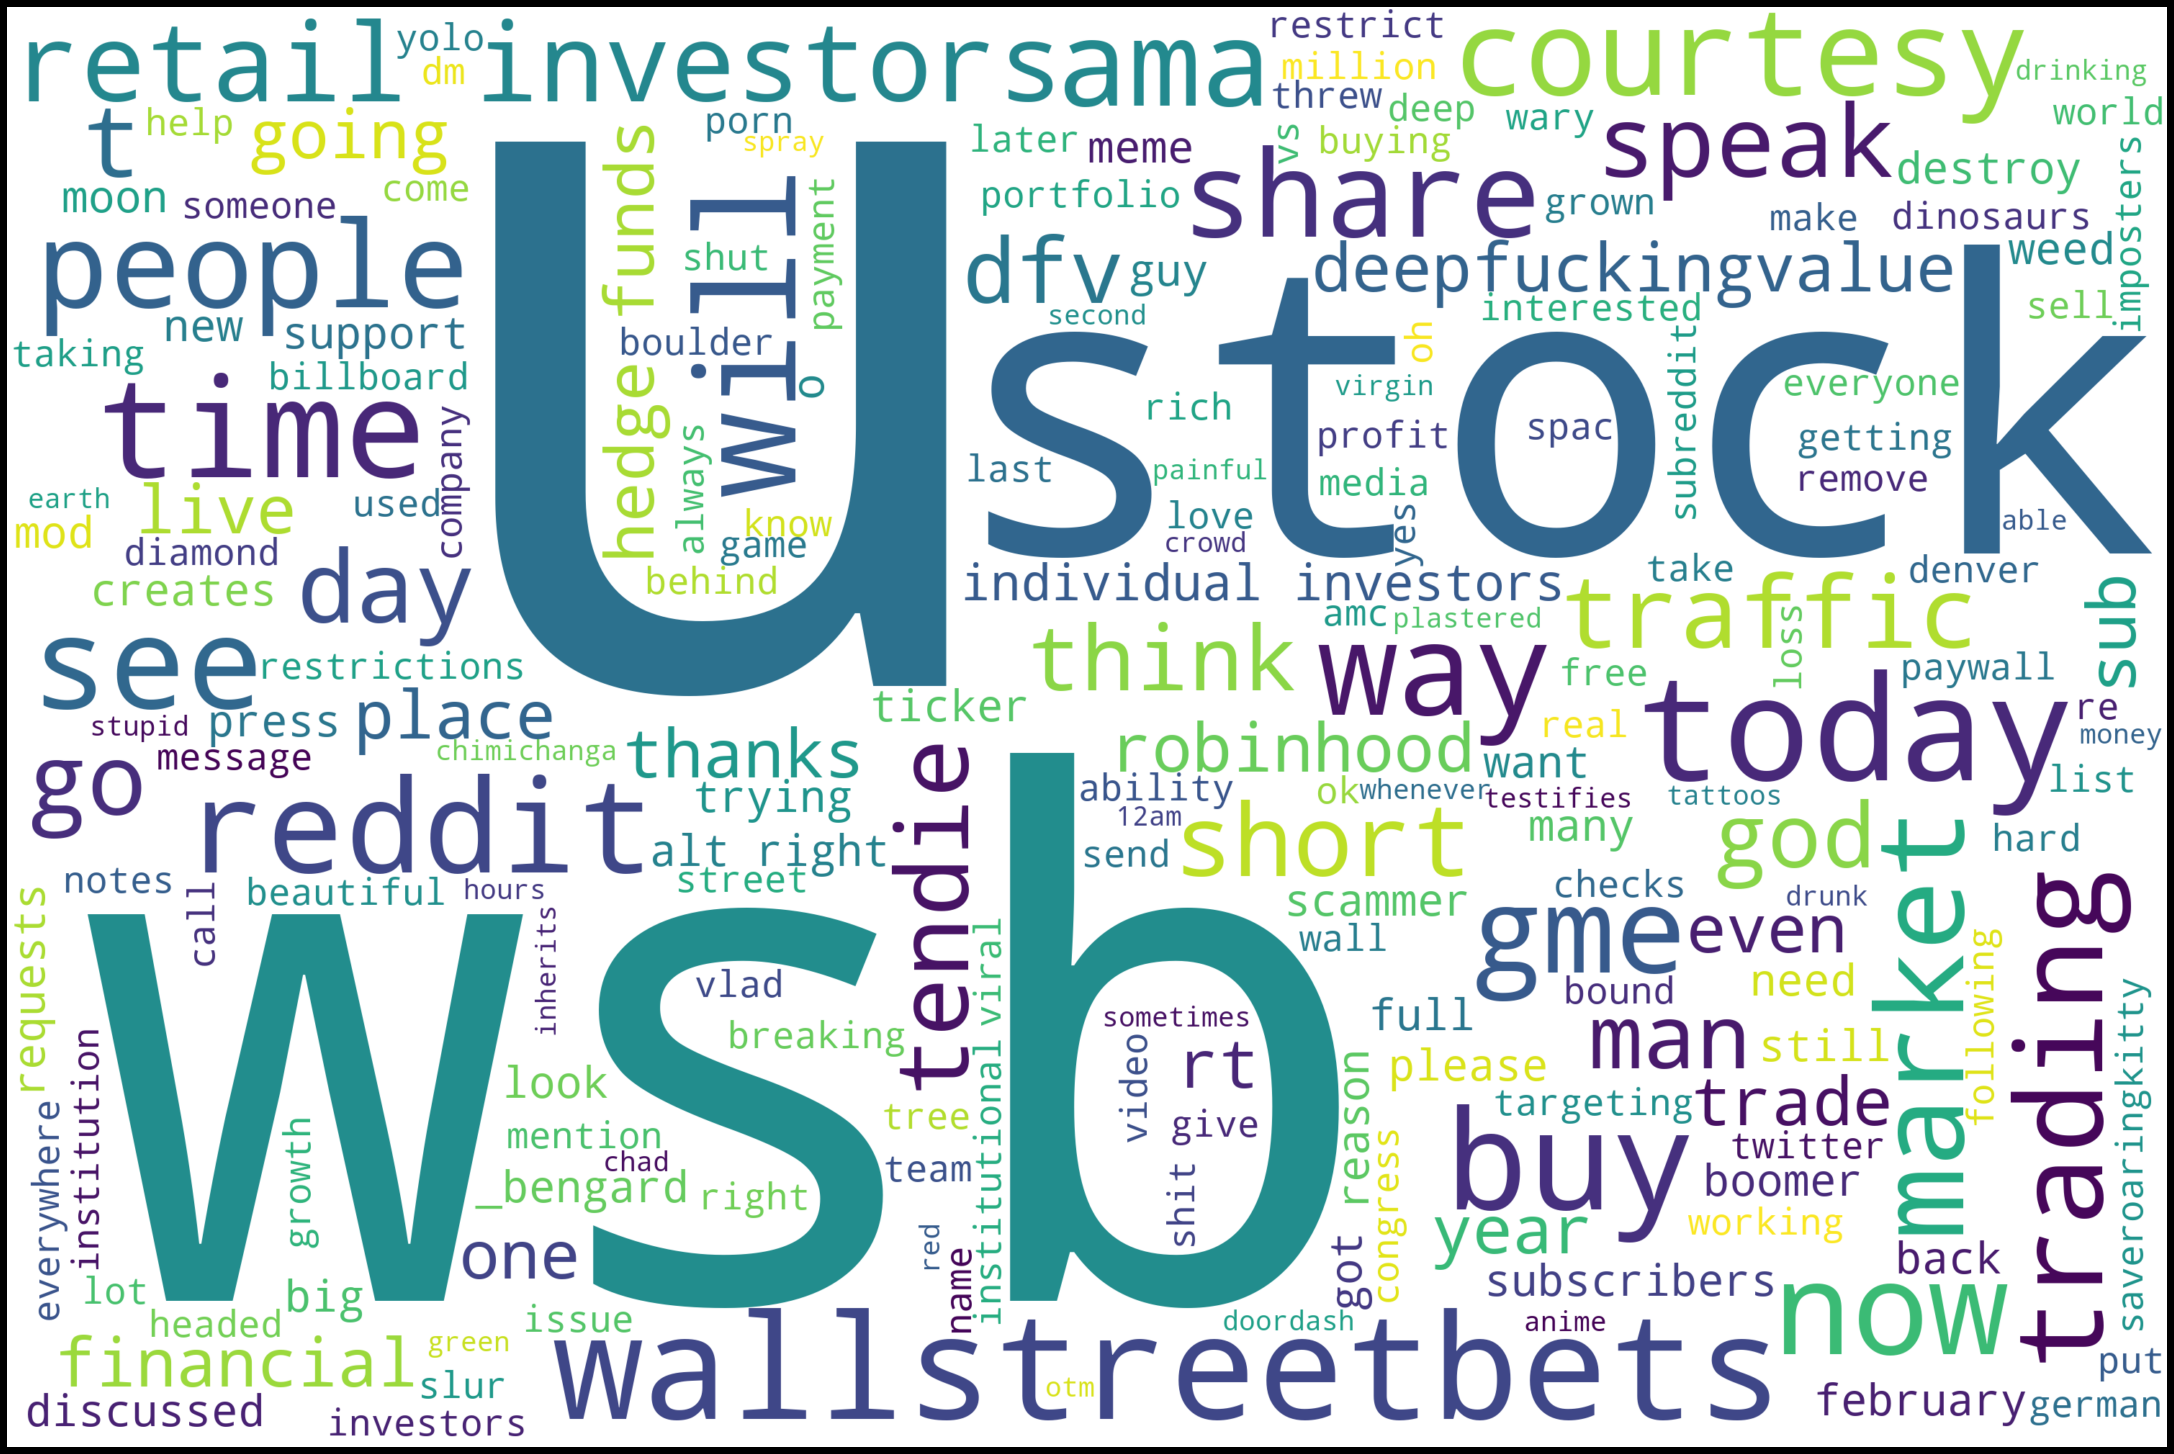

In [20]:
# Visual of text analysis: plotting a word cloud

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(' '.join( [twts for twts in df['Text']] ))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print(twitterUser + ' all Tweets ' + 'Wordcloud')
plt.show()

In [21]:
#Modeling is discussed after sentiment analysis

In [22]:
# Quick sentiment analysis through subjectivity and polarity plotting
#create function first to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create two new columns
df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)

# show df

df

Tweets  \
0                @VictimCrypto https://t.co/NqtYcCpppR   
1                                                   💎🤲   
2    Tattoos are like love.\n\nBeautiful and someti...   
3            WSB but its anime https://t.co/scS2Bp2PvI   
4    Can we all just think for a second about how s...   
..                                                 ...   
134  Where do we go from here and who is going to s...   
135  Due to the in tents load the sub was put under...   
136            Who tf are you? https://t.co/seOzeykroP   
137  @chamath @memechelangelo @Nmatt007 Chamath, co...   
138  The Tendieman has come.\n\nht u/quigonshin htt...   

                                                  Text  text_len  \
0                                                              1   
1                                                   💎🤲         2   
2    tattoos are like love.\n\nbeautiful and someti...        59   
3                                   wsb but its anime         18   
4    can we all just think for a second about how s...       202   
..                                                 ...       ...   
134  where do we go from here and who is going to s...        66   
135  due to the in tents load the sub was put under...       205   
136                                   who tf are you?         16   
137     chamath, come do an ama on wsb. give the pe...       114   
138        the tendieman has come.\n\nht u/quigonshin         41   

     text_word_count                                              punct  \
0                  0                                                      
1                  1                                                 💎🤲   
2                  8  tattoos are like love\n\nbeautiful and sometim...   
3                  4                                 wsb but its anime    
4                 41  can we all just think for a second about how s...   
..               ...                                                ...   
134               16  where do we go from here and who is going to s...   
135               39  due to the in tents load the sub was put under...   
136                4                                    who tf are you    
137               22     chamath come do an ama on wsb give the peop...   
138                6          the tendieman has come\n\nht uquigonshin    

                                             tokenized  \
0                                                 [, ]   
1                                                 [, ]   
2    [tattoos, are, like, love, beautiful, and, som...   
3                             [wsb, but, its, anime, ]   
4    [can, we, all, just, think, for, a, second, ab...   
..                                                 ...   
134  [where, do, we, go, from, here, and, who, is, ...   
135  [due, to, the, in, tents, load, the, sub, was,...   
136                              [who, tf, are, you, ]   
137  [, chamath, come, do, an, ama, on, wsb, give, ...   
138     [the, tendieman, has, come, ht, uquigonshin, ]   

                                               nonstop  \
0                                                 [, ]   
1                                                 [, ]   
2    [tattoos, like, love, beautiful, sometimes, pa...   
3                                       [wsb, anime, ]   
4    [think, second, stupid, market, hours, buy, ch...   
..                                                 ...   
134                      [go, going, step, help, us, ]   
135  [due, tents, load, sub, put, today, explosive,...   
136                                             [tf, ]   
137  [, chamath, come, ama, wsb, give, people, want...   
138               [tendieman, come, ht, uquigonshin, ]   

                                               stemmed  \
0                                                 [, ]   
1                                                 [, ]   
2        [tattoo, like, love, beauti, sometim, pain, ]   
3      

In [23]:
# compute negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

Tweets  \
0                @VictimCrypto https://t.co/NqtYcCpppR   
1                                                   💎🤲   
2    Tattoos are like love.\n\nBeautiful and someti...   
3            WSB but its anime https://t.co/scS2Bp2PvI   
4    Can we all just think for a second about how s...   
..                                                 ...   
134  Where do we go from here and who is going to s...   
135  Due to the in tents load the sub was put under...   
136            Who tf are you? https://t.co/seOzeykroP   
137  @chamath @memechelangelo @Nmatt007 Chamath, co...   
138  The Tendieman has come.\n\nht u/quigonshin htt...   

                                                  Text  text_len  \
0                                                              1   
1                                                   💎🤲         2   
2    tattoos are like love.\n\nbeautiful and someti...        59   
3                                   wsb but its anime         18   
4    can we all just think for a second about how s...       202   
..                                                 ...       ...   
134  where do we go from here and who is going to s...        66   
135  due to the in tents load the sub was put under...       205   
136                                   who tf are you?         16   
137     chamath, come do an ama on wsb. give the pe...       114   
138        the tendieman has come.\n\nht u/quigonshin         41   

     text_word_count                                              punct  \
0                  0                                                      
1                  1                                                 💎🤲   
2                  8  tattoos are like love\n\nbeautiful and sometim...   
3                  4                                 wsb but its anime    
4                 41  can we all just think for a second about how s...   
..               ...                                                ...   
134               16  where do we go from here and who is going to s...   
135               39  due to the in tents load the sub was put under...   
136                4                                    who tf are you    
137               22     chamath come do an ama on wsb give the peop...   
138                6          the tendieman has come\n\nht uquigonshin    

                                             tokenized  \
0                                                 [, ]   
1                                                 [, ]   
2    [tattoos, are, like, love, beautiful, and, som...   
3                             [wsb, but, its, anime, ]   
4    [can, we, all, just, think, for, a, second, ab...   
..                                                 ...   
134  [where, do, we, go, from, here, and, who, is, ...   
135  [due, to, the, in, tents, load, the, sub, was,...   
136                              [who, tf, are, you, ]   
137  [, chamath, come, do, an, ama, on, wsb, give, ...   
138     [the, tendieman, has, come, ht, uquigonshin, ]   

                                               nonstop  \
0                                                 [, ]   
1                                                 [, ]   
2    [tattoos, like, love, beautiful, sometimes, pa...   
3                                       [wsb, anime, ]   
4    [think, second, stupid, market, hours, buy, ch...   
..                                                 ...   
134                      [go, going, step, help, us, ]   
135  [due, tents, load, sub, put, today, explosive,...   
136                                             [tf, ]   
137  [, chamath, come, ama, wsb, give, people, want...   
138               [tendieman, come, ht, uquigonshin, ]   

                                               stemmed  \
0                                                 [, ]   
1                                                 [, ]   
2        [tattoo, like, love, beauti, sometim, pain, ]   
3      

In [24]:
#Number of Tweets (Total, Positive, Negative, Neutral)

ptweets = df[df.Sentiment == 'Positive']
nntweets = df[df.Sentiment == 'Neutral']
ntweets = df[df.Sentiment == 'Negative']
ttweets = pd.DataFrame(df)

ptweets = ptweets['Text']
positive_pct = round( (ptweets.shape[0] / df.shape[0]) * 100, 1)
p_pct = "{:.1%}".format(positive_pct/100)

nntweets = nntweets['Text']
neutral_pct = round( (nntweets.shape[0] / df.shape[0]) * 100 , 1)
nn_pct = "{:.1%}".format(neutral_pct/100)

ntweets = ntweets['Text']
negative_pct = round( (ntweets.shape[0] / df.shape[0]) * 100 , 1)
n_pct = "{:.1%}".format(negative_pct/100)

print("total number of tweets included in Sentiment Analysis: ",len(ttweets))
print(len(ptweets), '(',p_pct,')' + " of tweets include positive sentiment")
print(len(nntweets), '(',nn_pct,')' +  " of tweets include neutral sentiment")
print(len(ntweets), '(',n_pct,')' +  " of tweets include negative sentiment")

total number of tweets included in Sentiment Analysis:  139
42 ( 30.2% ) of tweets include positive sentiment
78 ( 56.1% ) of tweets include neutral sentiment
19 ( 13.7% ) of tweets include negative sentiment


In [25]:
# all positive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Sentiment'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Text'][i])
    print()
    j = j+1

1) tattoos are like love.

beautiful and sometimes painful... 

2) wallstreetbets new money gives the crowd a spray 

3) huge shoutout to _collective and  for selflessly working so hard on this. he doesn't even know we're releasing this so show him some love.





4) breaking: class action lawsuit filed against our lord and savior /u/deepfuckingvalue by hagens berman alleging gme manipulation

dfv shared his tendies recipes with the world and this is the thanks he gets?



5) tomorrow, live from the capitol 

6) happy valentine's day to my wife and her boyfriend.

7) uh ok... markets would literally collapse. 

8) most discussed stocks for february 11th 

9) most discussed stocks for february 10th 

10) was going to buy more weed stocks but ended up just buying more weed. 

11) looks like new stimi is on the way... what’re we buying boys? 

12) buy bitcoin and weed stocks apparently.

13) how to get rich (without getting lucky):

14) we used to be rich. 

15) most discussed stocks for 

In [26]:
# all negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Sentiment'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Text'][i])
    print()
    j = j+1

1) can we all just think for a second about how stupid market hours are?

if i can buy a chimichanga on doordash at 12am (while drunk) i should be able to buy deep otm calls on meme stocks whenever i want.

2) i see stocks of green, red tickers too. 
i see them moon, for me and you.
and i think to myself...

what a shit portfolio.

3) god creates dinosaurs. god destroys dinosaurs. god creates man. man destroys god. man creates stocks...

stocks destroy man. dfv inherits the earth 🦕💎👐🦕 

4) payment for order flow or zero commission trading isn't the issue... the issue is our financial system is an archaic low-tech web of inefficient institutions.

i mean why does it still take 2 days for a trade to clear when i can buy an onlyfans subscription instantly??

5) they didn't want us to release this. they fought hard to prevent us from sharing this video we made with you, but now we dgaf and it's time for you to see it...



6) live today at 12:00pm et

game stopped? who wins (financial serv

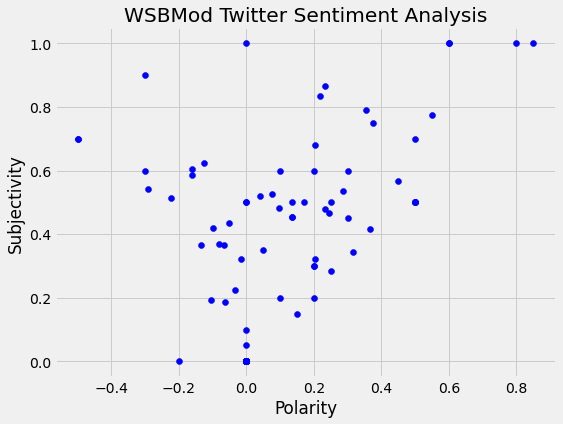

In [27]:
# plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue' )

plt.title(twitterUser + ' Twitter ' + 'Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

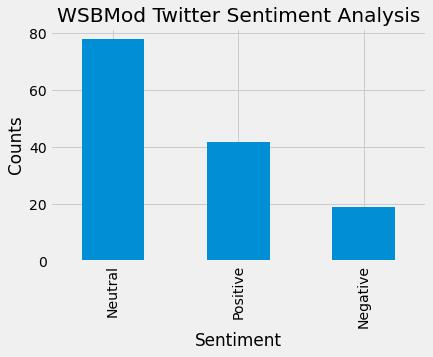

In [28]:
# value count

df['Sentiment'].value_counts()

plt.title(twitterUser + ' Twitter ' + 'Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()

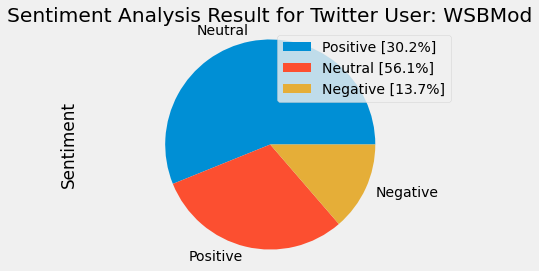

In [29]:
#Creating PieChart

labels = ['Positive ['+str(p_pct)+']' , 'Neutral ['+str(nn_pct)+']','Negative ['+str(n_pct)+']']
plt.title('Sentiment Analysis Result for Twitter User: ' + twitterUser)
df['Sentiment'].value_counts().plot(kind='pie')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

In [30]:
#Creating Word Clouds to depict positive & negative sentiments
positive_titles = df[df['Sentiment'] == 'Positive']
positive_titles.head()

Tweets  \
2   Tattoos are like love.\n\nBeautiful and someti...   
5   Wallstreetbets new money gives the crowd a spr...   
15  Huge shoutout to @LESS_collective and @russroe...   
22  BREAKING: Class Action Lawsuit filed against o...   
23  Tomorrow, live from The Capitol https://t.co/9...   

                                                 Text  text_len  \
2   tattoos are like love.\n\nbeautiful and someti...        59   
5   wallstreetbets new money gives the crowd a spray         49   
15  huge shoutout to _collective and  for selfless...       142   
22  breaking: class action lawsuit filed against o...       208   
23                   tomorrow, live from the capitol         32   

    text_word_count                                              punct  \
2                 8  tattoos are like love\n\nbeautiful and sometim...   
5                 8  wallstreetbets new money gives the crowd a spray    
15               24  huge shoutout to collective and  for selflessl...   
22               32  breaking class action lawsuit filed against ou...   
23                5                    tomorrow live from the capitol    

                                            tokenized  \
2   [tattoos, are, like, love, beautiful, and, som...   
5   [wallstreetbets, new, money, gives, the, crowd...   
15  [huge, shoutout, to, collective, and, for, sel...   
22  [breaking, class, action, lawsuit, filed, agai...   
23             [tomorrow, live, from, the, capitol, ]   

                                              nonstop  \
2   [tattoos, like, love, beautiful, sometimes, pa...   
5   [wallstreetbets, new, money, gives, crowd, spr...   
15  [huge, shoutout, collective, selflessly, worki...   
22  [breaking, class, action, lawsuit, filed, lord...   
23                        [tomorrow, live, capitol, ]   

                                              stemmed  \
2       [tattoo, like, love, beauti, sometim, pain, ]   
5   [wallstreetbet, new, money, give, crowd, spray, ]   
15  [huge, shoutout, collect, selflessli, work, ha...   
22  [break, class, action, lawsuit, file, lord, sa...   
23                        [tomorrow, live, capitol, ]   

                                                lemma  Subjectivity  Polarity  \
2   [tattoo, like, love, beautiful, sometimes, pai...      0.833333  0.216667   
5   [wallstreetbets, new, money, give, crowd, spra...      0.454545  0.136364   
15  [huge, shoutout, collective, selflessly, worki...      0.680556  0.202778   
22  [breaking, class, action, lawsuit, filed, lord...      0.150000  0.150000   
23                        [tomorrow, live, capitol, ]      0.500000  0.136364   

   Sentiment  
2   Positive  
5   Positive  
15  Positive  
22  Positive  
23  Positive

WSBMod Twitter all Positive Tweets Wordcloud


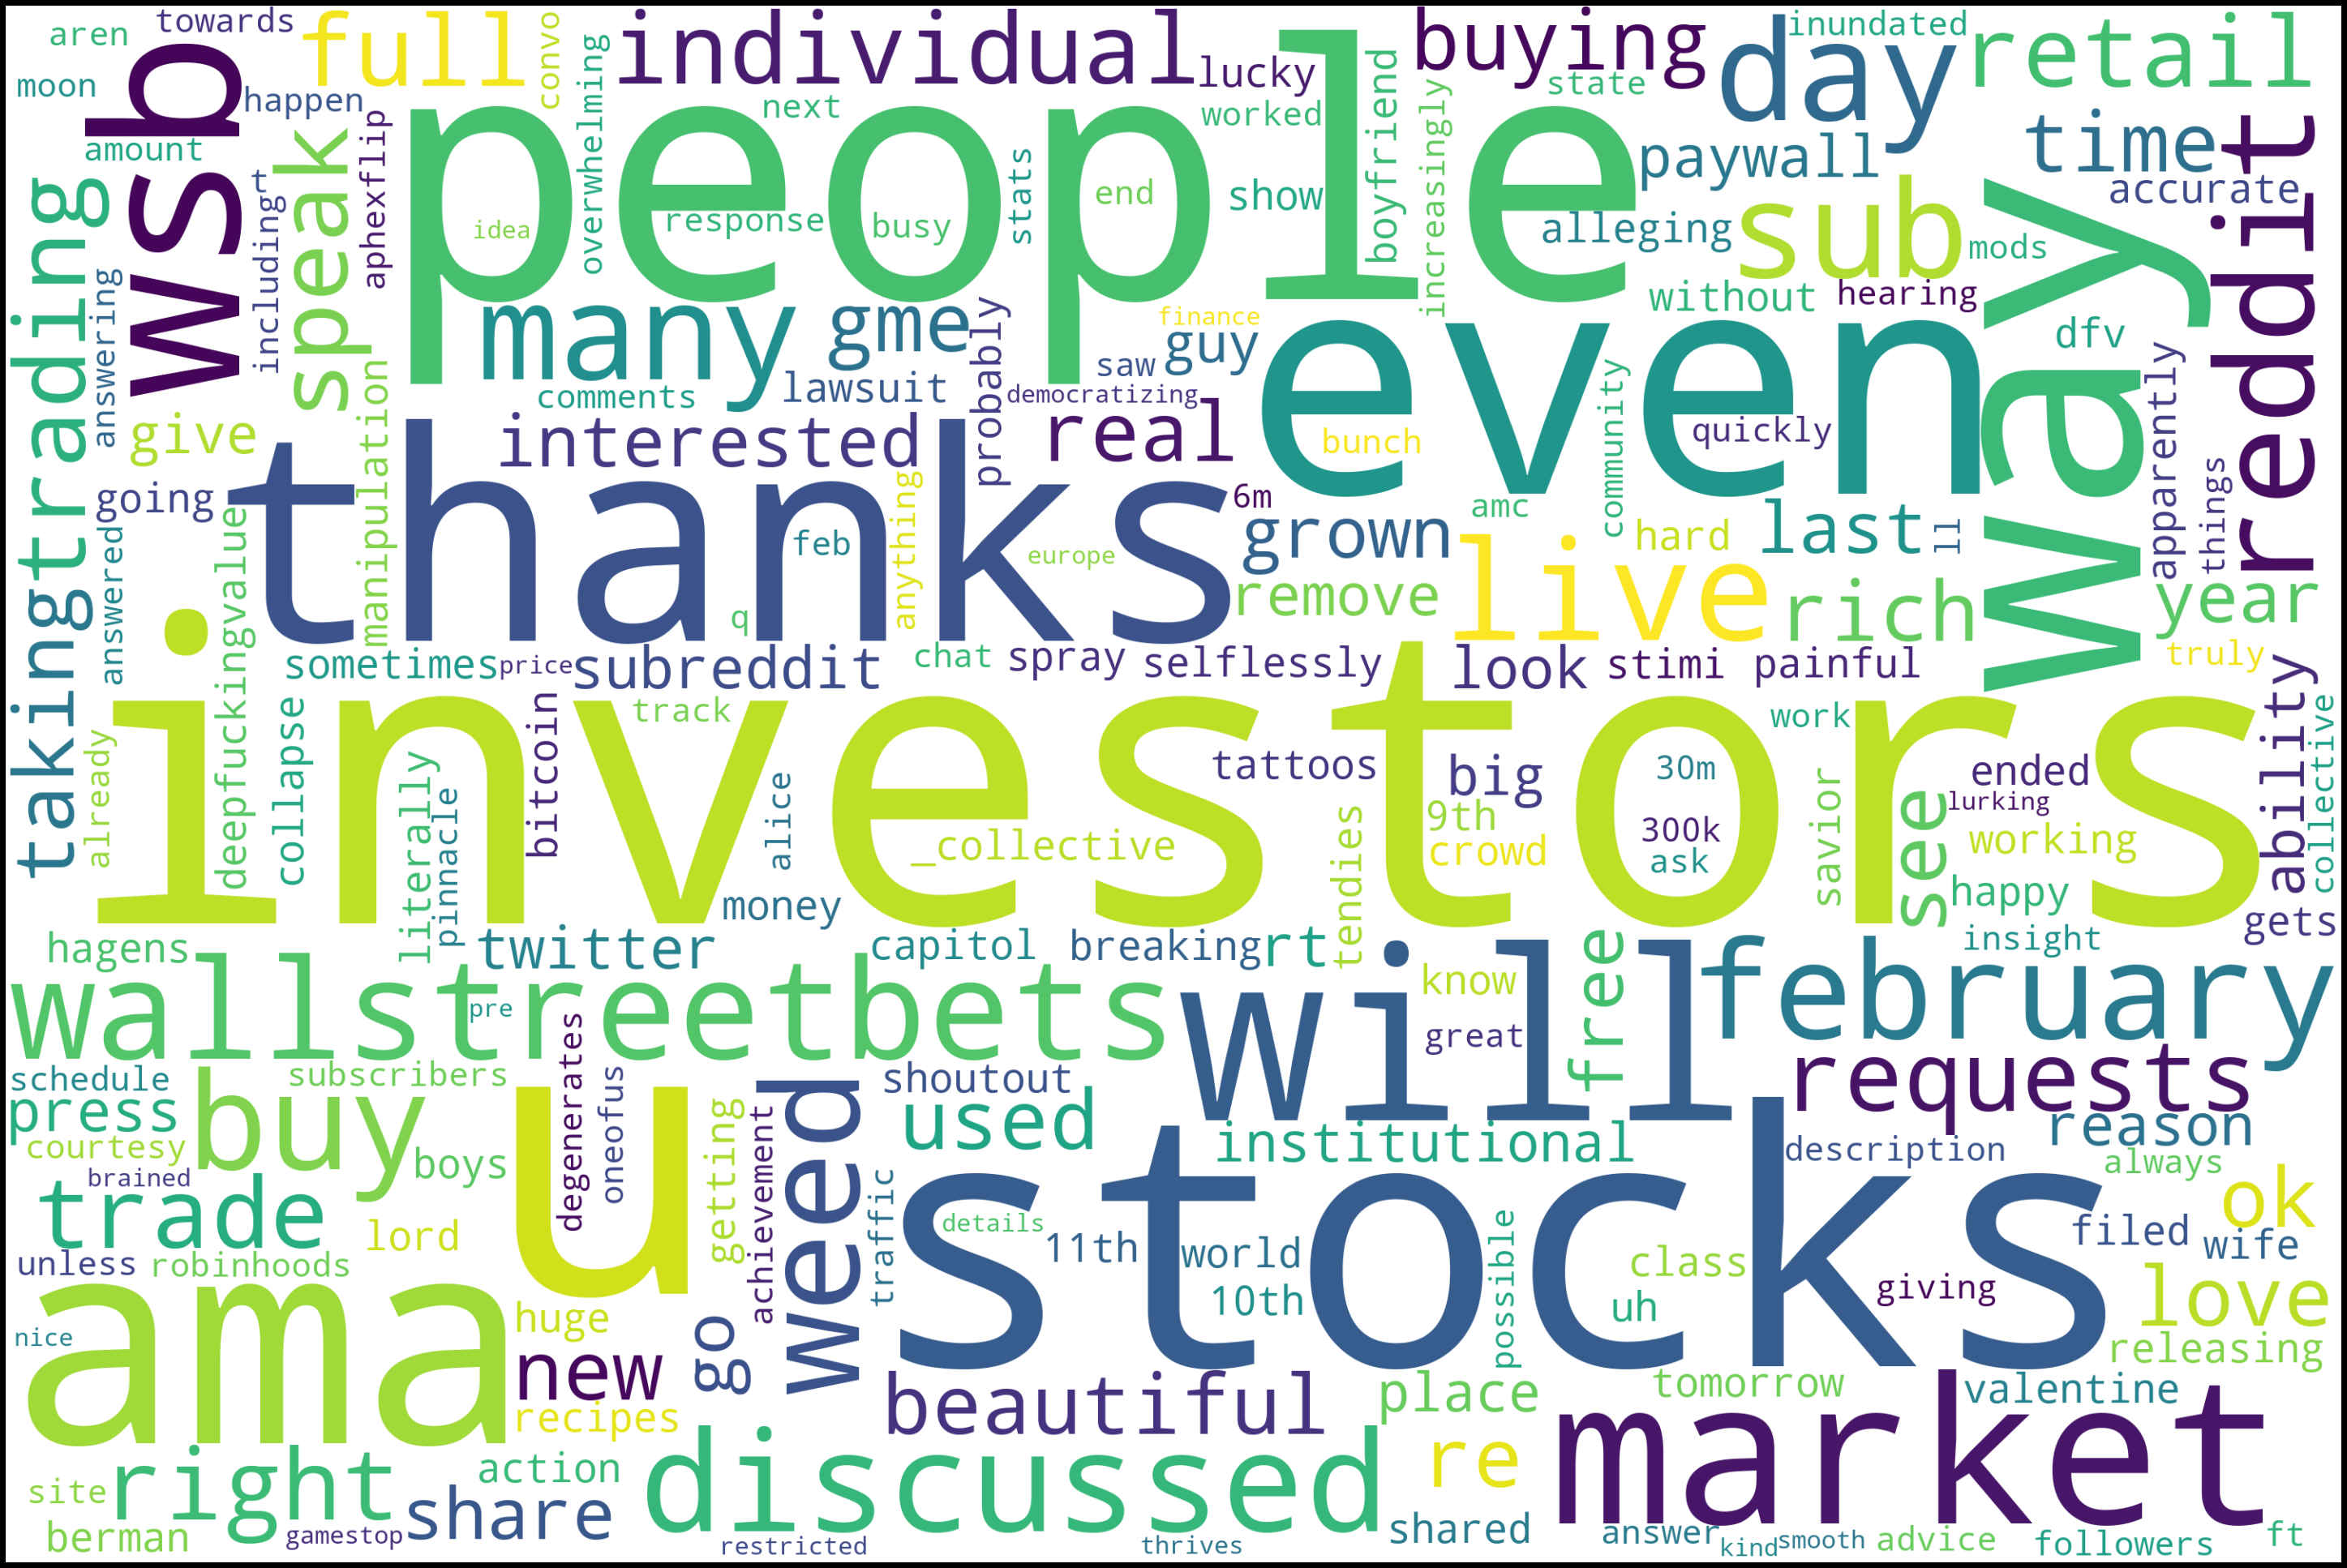

In [31]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(' '.join(positive_titles['Text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print(twitterUser + ' Twitter ' + 'all Positive Tweets Wordcloud')
plt.show()

In [32]:
negative_titles = df[df['Sentiment'] == 'Negative']
negative_titles.head()

Tweets  \
4   Can we all just think for a second about how s...   
6   I see stocks of green, red tickers too. \nI se...   
8   God creates dinosaurs. God destroys dinosaurs....   
12  Payment for order flow or zero commission trad...   
16  They didn't want us to release this. They foug...   

                                                 Text  text_len  \
4   can we all just think for a second about how s...       202   
6   i see stocks of green, red tickers too. \ni se...       122   
8   god creates dinosaurs. god destroys dinosaurs....       153   
12  payment for order flow or zero commission trad...       269   
16  they didn't want us to release this. they foug...       162   

    text_word_count                                              punct  \
4                41  can we all just think for a second about how s...   
6                25  i see stocks of green red tickers too \ni see ...   
8                23  god creates dinosaurs god destroys dinosaurs g...   
12               47  payment for order flow or zero commission trad...   
16               33  they didnt want us to release this they fought...   

                                            tokenized  \
4   [can, we, all, just, think, for, a, second, ab...   
6   [i, see, stocks, of, green, red, tickers, too,...   
8   [god, creates, dinosaurs, god, destroys, dinos...   
12  [payment, for, order, flow, or, zero, commissi...   
16  [they, didnt, want, us, to, release, this, the...   

                                              nonstop  \
4   [think, second, stupid, market, hours, buy, ch...   
6   [see, stocks, green, red, tickers, see, moon, ...   
8   [god, creates, dinosaurs, god, destroys, dinos...   
12  [payment, order, flow, zero, commission, tradi...   
16  [didnt, want, us, release, fought, hard, preve...   

                                              stemmed  \
4   [think, second, stupid, market, hour, buy, chi...   
6   [see, stock, green, red, ticker, see, moon, th...   
8   [god, creat, dinosaur, god, destroy, dinosaur,...   
12  [payment, order, flow, zero, commiss, trade, i...   
16  [didnt, want, us, releas, fought, hard, preven...   

                                                lemma  Subjectivity  Polarity  \
4   [think, second, stupid, market, hour, buy, chi...      0.605000 -0.160000   
6   [see, stock, green, red, ticker, see, moon, th...      0.366667 -0.133333   
8   [god, creates, dinosaur, god, destroys, dinosa...      0.000000 -0.200000   
12  [payment, order, flow, zero, commission, tradi...      0.434375 -0.053125   
16  [didnt, want, u, release, fought, hard, preven...      0.541667 -0.291667   

   Sentiment  
4   Negative  
6   Negative  
8   Negative  
12  Negative  
16  Negative

WSBMod Twitter all Negative Tweets Wordcloud


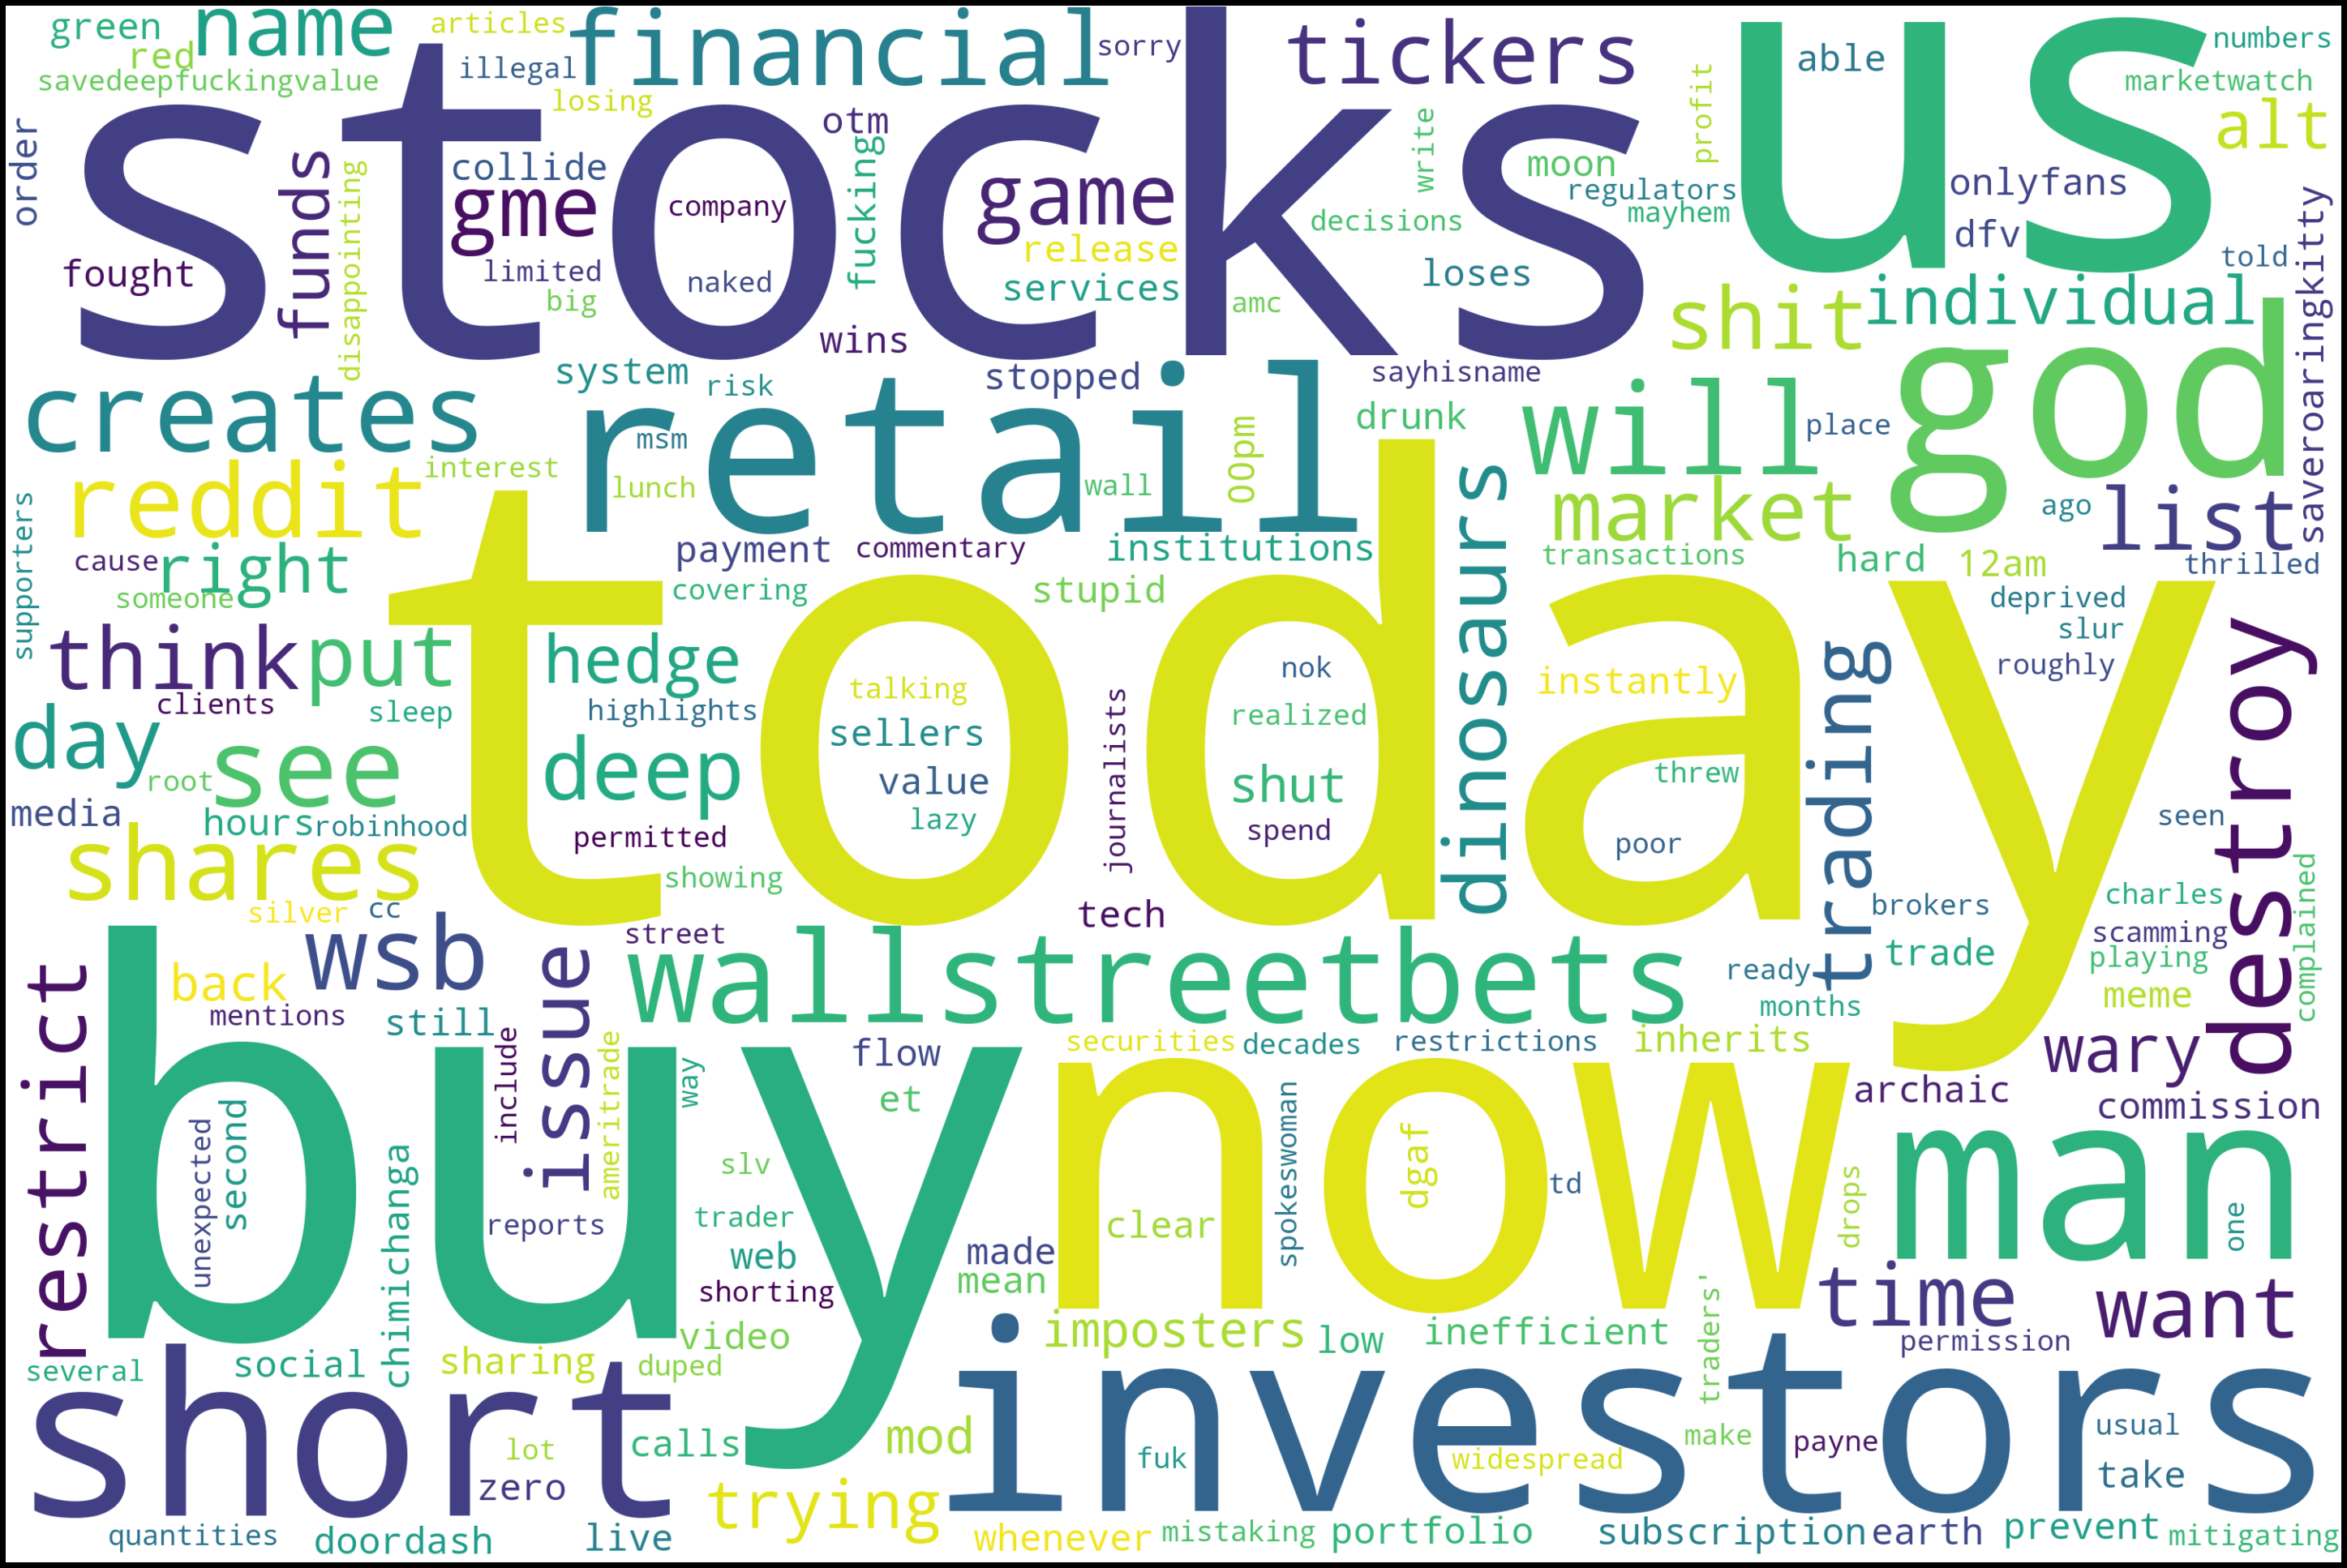

In [33]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(' '.join(negative_titles['Text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print(twitterUser + ' Twitter ' + 'all Negative Tweets Wordcloud')
plt.show()

In [34]:
round(pd.DataFrame(df.groupby("Sentiment").text_len.mean()),2)

text_len
Sentiment          
Negative     167.74
Neutral       47.77
Positive     104.88

In [35]:
round(pd.DataFrame(df.groupby("Sentiment").text_word_count.mean()),2)

text_word_count
Sentiment                 
Negative             29.26
Neutral               7.76
Positive             18.60

In [36]:
#Topic modeling without time factor
#Latent Semantic Analysis
#Probablistic Latent Semantic Analysis
#Latent Dirichlet Allocation
#Correlated Topic Model

In [37]:
#Topic Modeling with time factor
#Topic Over Time
#Dynamic Topic Models
#Multiscale Topic Tomography
#Dynamic Topic Correlation Detection

# Latent Semantic Analysis (LSA) for Topic Discovery

In [41]:
from sklearn.decomposition import TruncatedSVD

In [42]:
#Matrix decomposition using TruncatedSVD function in sklearn, the components of svd_model are our topics(20 selected)
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(response)

len(svd_model.components_)

20

In [45]:
#To print a list of most important words from our 20 topics
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
ipo
 
respons
 
chamath
 
tattoo
 
reddit
 
like
 
stewart
 
Topic 1: 
continu
 
restrict
 
robinhood
 
open
 
break
 
fifth
 
happi
 
Topic 2: 
chamath
 
check
 
chad
 
subscript
 
thank
 
dank
 
charl
 
Topic 3: 
earlier
 
ago
 
hand
 
squeez
 
world
 
help
 
design
 
Topic 4: 
marketwatch
 
good
 
press
 
subscrib
 
organ
 
purchas
 
poor
 
Topic 5: 
poor
 
recip
 
god
 
ubotti
 
site
 
well
 
inquiri
 
Topic 6: 
savedeepfuckingvalu
 
nok
 
heard
 
ucrag
 
investor
 
theyv
 
cnbc
 
Topic 7: 
detail
 
valu
 
real
 
th
 
isnt
 
dank
 
work
 
Topic 8: 
ht
 
thing
 
never
 
appar
 
broker
 
savior
 
mayhem
 
Topic 9: 
heard
 
suburb
 
open
 
robinhood
 
ye
 
boyfriend
 
subreddit
 
Topic 10: 
poor
 
spray
 
receiv
 
price
 
jealou
 
heard
 
quebec
 
Topic 11: 
publish
 
ucrag
 
billboard
 
luv
 
lowtech
 
creat
 
porn
 
Topic 12: 
alic
 
sy
 
busi
 
collid
 
tfw
 
plaster
 
see
 
Topic 13: 
possibl
 
chat
 
request
 
redact
 
peak
 
capit
 
feb
 
Topic 14: 
purchas
 
play
 
un

# Latent Dirichlet Allocation (LDA)Model Training

In [70]:
#Preparing for LDA by creating a corpus and dictionary

import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(X)
# Create Corpus
texts = X
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 500)]


In [73]:
#LDA Model training

import gensim 
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.993*"\x00\x00\x00\x00" + 0.007*"\x01\x00\x00\x00"'),
 (1, '0.535*"\x00\x00\x00\x00" + 0.465*"\x01\x00\x00\x00"'),
 (2, '0.998*"\x00\x00\x00\x00" + 0.002*"\x01\x00\x00\x00"'),
 (3, '0.537*"\x00\x00\x00\x00" + 0.463*"\x01\x00\x00\x00"'),
 (4, '0.533*"\x00\x00\x00\x00" + 0.467*"\x01\x00\x00\x00"'),
 (5, '0.998*"\x00\x00\x00\x00" + 0.002*"\x01\x00\x00\x00"'),
 (6, '0.998*"\x00\x00\x00\x00" + 0.002*"\x01\x00\x00\x00"'),
 (7, '0.533*"\x00\x00\x00\x00" + 0.467*"\x01\x00\x00\x00"'),
 (8, '0.998*"\x00\x00\x00\x00" + 0.002*"\x01\x00\x00\x00"'),
 (9, '0.530*"\x00\x00\x00\x00" + 0.470*"\x01\x00\x00\x00"')]


In [76]:
#Visualisation of results

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
8     -0.097663 -0.0       1        1  21.640439
5     -0.097619  0.0       2        1  21.465473
6     -0.096527 -0.0       3        1  21.404726
2     -0.097159 -0.0       4        1  21.279264
0     -0.086083 -0.0       5        1  14.110297
3      0.093411 -0.0       6        1   0.019960
1      0.094306 -0.0       7        1   0.019960
7      0.095257  0.0       8        1   0.019960
4      0.095345 -0.0       9        1   0.019960
9      0.096732 -0.0      10        1   0.019960, topic_info=   Term           Freq          Total Category  logprob  loglift
0        312073.000000  312073.000000  Default   2.0000   2.0000
1          926.000000     926.000000  Default   1.0000   1.0000
0         67626.759022  312073.331246   Topic1  -0.0016   0.0014
1          107.816806     926.675694   Topic1  -6.4429  -0.6206
0         67078.880285  312073.331246   Topic2  -0.0016   0.0014
1          108.053135     926.675694   Topic2  -6.4326  -0.6103
0         66860.766426  312073.331246   Topic3  -0.0020   0.0009
1          136.025860     926.675694   Topic3  -6.1996  -0.3772
0         66485.315894  312073.331246   Topic4  -0.0018   0.0012
1          118.779679     926.675694   Topic4  -6.3293  -0.5069
1          310.330989     926.675694   Topic5  -4.9581   0.8643
0         43854.901683  312073.331246   Topic5  -0.0071  -0.0041
1           28.942571     926.675694   Topic6  -0.7695   5.0529
0            33.532881  312073.331246   Topic6  -0.6222  -0.6193
1           29.050229     926.675694   Topic7  -0.7657   5.0566
0            33.425212  312073.331246   Topic7  -0.6255  -0.6225
1           29.163812     926.675694   Topic8  -0.7618   5.0605
0            33.311618  312073.331246   Topic8  -0.6289  -0.6259
1           29.174281     926.675694   Topic9  -0.7615   5.0609
0            33.301146  312073.331246   Topic9  -0.6292  -0.6262
1           29.338331     926.675694  Topic10  -0.7559   5.0665
0            33.137081  312073.331246  Topic10  -0.6341  -0.6312, token_table=      Topic      Freq  Term
term                       
0         1  0.216702      
0         2  0.214946      
0         3  0.214248      
0         4  0.213043      
0         5  0.140528      
0         6  0.000109      
0         7  0.000106      
0         8  0.000106      
0         9  0.000106      
0        10  0.000106      
1         1  0.116546     
1         2  0.116546     
1         3  0.146761     
1         4  0.128416     
1         5  0.334529     
1         6  0.031295     
1         7  0.031295     
1         8  0.031295     
1         9  0.031295     
1        10  0.031295     , R=2, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 7, 3, 1, 4, 2, 8, 5, 10])